In [1]:
import pandas as pd
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
import numpy as np

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv('./data/conversion_data.csv')

In [3]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


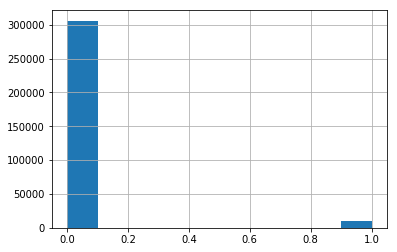

In [4]:
df['converted'].hist()

In [5]:
df['converted'].value_counts()

0    306000
1     10200
Name: converted, dtype: int64

In [6]:
df.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [7]:
df = pd.get_dummies(df, columns=['source','country'])

Decision trees often perform well on imbalanced datasets because their hierarchical structure allows them to learn signals from both classes.

In modern applied machine learning, tree ensembles (Random Forests, Gradient Boosted Trees, etc.) almost always outperform singular decision trees.

In [8]:
df.head()

,age,new_user,total_pages_visited,converted,source_Ads,source_Direct,source_Seo,country_China,country_Germany,country_UK,country_US
0,25,1,1,0,1,0,0,0,0,1,0
1,23,1,5,0,0,0,1,0,0,0,1
2,28,1,4,0,0,0,1,0,0,0,1
3,39,1,5,0,0,0,1,1,0,0,0
4,30,1,6,0,0,0,1,0,0,0,1


# 1. Prediction Model

In [9]:
y = df.converted
X = df.drop('converted', axis=1)

seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed, stratify = y)    

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

prob = clf.predict_proba(X_test)
prob = [p[1] for p in prob]
print(roc_auc_score(y_test, prob))

0.9443902705690118


# 2. Important features

In [10]:
column_names = list(X_train.columns.values)
var_imp = sorted(zip(map(lambda x: x, clf.feature_importances_), column_names), 
             reverse = True)

print("\nFeatures Ranking - Top 3:\n")
for feat in var_imp[0:3]:
    print(feat)


Features Ranking - Top 3:

(0.8050665969345902, 'total_pages_visited')
(0.1122190491357137, 'age')
(0.04151696523126265, 'new_user')


### 3. Recommendation for the product and marketing team

In [11]:
df = pd.read_csv('./data/conversion_data.csv')
df.groupby(['country','source','converted']).size()

country  source  converted
China    Ads     0            21529
                 1               32
         Direct  0            17439
                 1               24
         Seo     0            37532
                 1               46
Germany  Ads     0             3509
                 1              251
         Direct  0             2711
                 1              153
         Seo     0             6020
                 1              412
UK       Ads     0            12766
                 1              752
         Direct  0            10616
                 1              515
         Seo     0            22518
                 1             1283
US       Ads     0            47876
                 1             2025
         Direct  0            39614
                 1             1348
         Seo     0            83870
                 1             3359
dtype: int64

In [12]:
pd.crosstab(df.source, df.converted,margins=True)

converted,0,1,All
source,,,
Ads,85680,3060,88740
Direct,70380,2040,72420
Seo,149940,5100,155040
All,306000,10200,316200


In [13]:
pd.crosstab(df.source, df.converted,normalize=True)

converted,0,1
source,,
Ads,0.270968,0.009677
Direct,0.222581,0.006452
Seo,0.474194,0.016129


In [14]:
pd.crosstab(df.country, df.converted,margins=True)

converted,0,1,All
country,,,
China,76500,102,76602
Germany,12240,816,13056
UK,45900,2550,48450
US,171360,6732,178092
All,306000,10200,316200


In [15]:
pd.crosstab(df.country, df.converted,normalize='index')

converted,0,1
country,,
China,0.998668,0.001332
Germany,0.937500,0.062500
UK,0.947368,0.052632
US,0.962199,0.037801


In [16]:
pd.crosstab([df.country, df.source], df.converted,normalize='index')

converted              0         1
country source                    
China   Ads     0.998516  0.001484
        Direct  0.998626  0.001374
        Seo     0.998776  0.001224
Germany Ads     0.933245  0.066755
        Direct  0.946578  0.053422
        Seo     0.935945  0.064055
UK      Ads     0.944370  0.055630
        Direct  0.953733  0.046267
        Seo     0.946095  0.053905
US      Ads     0.959420  0.040580
        Direct  0.967091  0.032909
        Seo     0.961492  0.038508

In [17]:
pd.crosstab(df.country, df.source,margins=True, normalize='index')

source,Ads,Direct,Seo
country,,,
China,0.281468,0.227971,0.490562
Germany,0.287990,0.219363,0.492647
UK,0.279009,0.229742,0.491249
US,0.280198,0.230005,0.489797
All,0.280645,0.229032,0.490323


In [18]:
pd.crosstab([df.source, df.country], df.converted, values=df.age, aggfunc=np.average)

converted               0          1
source country                      
Ads    China    30.657857  25.406250
       Germany  30.589057  26.533865
       UK       30.674918  26.325798
       US       30.694377  26.613827
Direct China    30.605081  25.958333
       Germany  30.694578  26.000000
       UK       30.644687  26.250485
       US       30.724643  26.875371
Seo    China    30.726420  26.000000
       Germany  30.789701  26.730583
       UK       30.682565  26.680436
       US       30.738631  26.444180

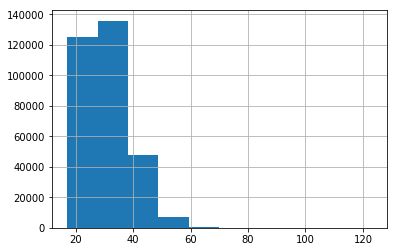

In [19]:
df.age.hist()

In [20]:
df['age_group'] = pd.cut(df['age'], bins=12, precision=1)


In [21]:
df.age_group.value_counts(sort=False)

(16.9, 25.8]       96991
(25.8, 34.7]      122798
(34.7, 43.5]       73224
(43.5, 52.3]       20490
(52.3, 61.2]        2531
(61.2, 70]           160
(70, 78.8]             3
(78.8, 87.7]           1
(87.7, 96.5]           0
(96.5, 105.3]          0
(105.3, 114.2]         1
(114.2, 123]           1
Name: age_group, dtype: int64

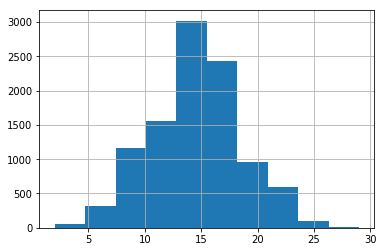

In [22]:
df['total_pages_visited'][df.converted==1].hist()

In [23]:
pd.crosstab(df.total_pages_visited,df.new_user,margins=True, normalize='columns')

new_user,0,1,All
total_pages_visited,,,
1,0.121410,0.132248,0.128839
2,0.132682,0.141513,0.138735
3,0.132632,0.141356,0.138612
4,0.125161,0.131944,0.129810
5,0.111537,0.116335,0.114826
6,0.092061,0.097373,0.095702
7,0.072836,0.074946,0.074282
8,0.054225,0.055960,0.055414
9,0.038711,0.038326,0.038447


### Suggestions to the team
1. Most of our target audience are from Germany, UK and USA. Thus we can concentrate more on those markets.
2. Concentrate the product team in building features that captures the age group of betweeen 17-30.
3. Ads and SEO source has a higher conversion rate than Direct search. Thus optimizing those regions
4. Concentrate the resources on UK, US, Germany region.

### Experiments

# 4. Hypothesis testing

    Ho = P1-P0 = 0
    Ha = P1-P0 > 0

@99% significance

Here P1 = 35/1000; P0 = 25/1000

On performing Z test, the score lies within the 2.58, thus fail to reject the null hypothesis.

Hence implementing the new methodology will have no statistical significant increase of the conversion rate.

## 5. I will use the data for understanding the ride share market and users behaviour.